In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

In [2]:
IMAGE_SIZE=250
BATCH_SIZE=8
CHANNELS=32
EPOCHS=5


In [3]:
train_data_dir = "CNN/Train"
test_data_dir = "CNN/Test"


In [4]:
X_train = []
y_train = []
X_test = []
y_test = []


In [5]:
def load_images_and_labels(data_dir, label):
    for image_file in os.listdir(data_dir):
        image_path = os.path.join(data_dir, image_file)
        if image_path.endswith(".jpg"):
            image = cv2.imread(image_path)
            if data_dir.startswith(train_data_dir):
                X_train.append(image)
                y_train.append(label)
            else:
                X_test.append(image)
                y_test.append(label)     


In [6]:
load_images_and_labels(os.path.join(train_data_dir, "undiseased"), label=0)
load_images_and_labels(os.path.join(train_data_dir, "diseased"), label=1)


In [7]:
load_images_and_labels(os.path.join(test_data_dir, "undiseased"), label=0)
load_images_and_labels(os.path.join(test_data_dir, "diseased"), label=1)


In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [9]:
target_size = (250, 250)

def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return resized_images

X_train_resized = resize_images(X_train, target_size)

X_test_resized = resize_images(X_test, target_size)

X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)


In [10]:
input_shape = (8,250, 250, 3)
num_classes = 2  
model = models.Sequential([
    layers.experimental.preprocessing.Resizing(250, 250),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=input_shape)


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (8, 250, 250, 3)          0         
                                                                 
 rescaling (Rescaling)       (8, 250, 250, 3)          0         
                                                                 
 random_flip (RandomFlip)    (8, 250, 250, 3)          0         
                                                                 
 random_rotation (RandomRot  (8, 250, 250, 3)          0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (8, 248, 248, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2  (8, 124, 124, 32)         0         
 D)                                                     

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10
batch_size = 2
validation_split=0.1
validation_data = (X_test_resized, y_test)
history = model.fit(X_train_resized, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)


Epoch 1/10
196/196 [==============================] - 33s 149ms/step - loss: 0.6997 - accuracy: 0.5077 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
196/196 [==============================] - 29s 146ms/step - loss: 0.6895 - accuracy: 0.5510 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/10
 83/196 [===========>..................] - ETA: 15s - loss: 0.6987 - accuracy: 0.4458

In [330]:
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


4/4 [==============================] - 1s 295ms/step - loss: 18.9188 - accuracy: 0.5400
Test loss: 18.918832778930664, Test accuracy: 0.5400000214576721


In [327]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_resized)


4/4 [==============================] - 1s 152ms/step


In [312]:
y_pred_classes = y_pred.argmax(axis=-1)


In [313]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1 Score: 0.68
Confusion Matrix:
[[34 16]
 [16 34]]


In [314]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

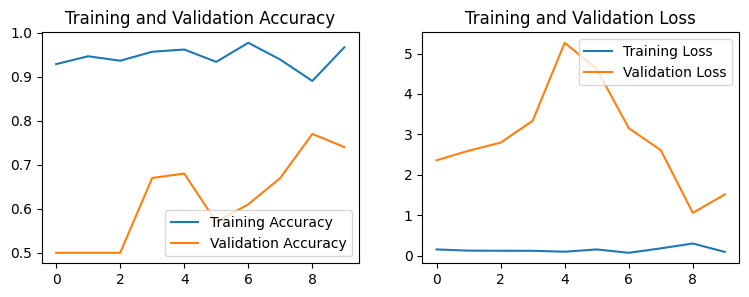

In [306]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()